<a href="https://colab.research.google.com/github/tiagopessoalima/covid-19/blob/master/pernambuco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descrição**
As informações exibidas são oriundas de uma planilha alimentada pela Secretaria de Planejamento e Gestão (SEPLAG) em parceria com a Secretaria Estadual de Saúde (SES) e a Agência Estadual de Tecnologia da Informação (ATI). Considerando grupos de paientes (óbitos, recuperados, transmissores, em isolamento, enfermaria e uti), analiso aqui comorbidades, data do óbito, dias para o óbito, hospitalização, municipio, sexo e sintomas.

**Bibliotecas**

In [0]:
import pandas as pd

**Dados**

In [0]:
pernambuco = pd.read_csv('https://raw.githubusercontent.com/tiagopessoalima/covid-19/master/dados/pernambuco.csv',sep=';')
pernambuco = pernambuco[pernambuco.classe=='CONFIRMADO']

In [0]:
pernambuco = pernambuco[pernambuco['comorbidades'].str.contains("CANCER|CARCINOMA|LEUCEMIA|ONCOLOG|NEOPLASIA", na=False)]
#pernambuco = pernambuco[(pernambuco.faixa_etaria=='0-9 anos') | (pernambuco.faixa_etaria=='10-19 anos')]

In [0]:
obito = pernambuco[pernambuco.evolucao=='OBITO']
recuperados = pernambuco[pernambuco.evolucao=='RECUPERADO']
transmissores = pernambuco[(pernambuco.evolucao=='ISOLAMENTO DOMICILIAR') | (pernambuco.evolucao=='INTERNADO LEITO DE ISOLAMENTO') | (pernambuco.evolucao=='INTERNADO UTI')]
isolamento = pernambuco[pernambuco.evolucao=='ISOLAMENTO DOMICILIAR']
enfermaria = pernambuco[pernambuco.evolucao=='INTERNADO LEITO DE ISOLAMENTO']
uti = pernambuco[pernambuco.evolucao=='INTERNADO UTI']

##**Resumo**
São exibidos o número com seu respectivo percentual. Considero aqui que cada individuo pode estar em três grupos: óbito, recuperado ou transmissor. No caso dos transmissores, o mesmo pode estar: em isolamento, enfermaria ou uti. O cálculo do percentual destes sub-grupos considerou o número de transmissores. Salienta-se que no decorrer do tempo, os transmissores migram para o grupo de óbito ou recuperado. O grupo indefinido é formado por indivíduos em que a evolução não foi especificada.

In [44]:
num_obi, num_rec, num_tra = len(obito), len(recuperados), len(transmissores) 
num_iso, num_enf, num_uti = len(isolamento), len(enfermaria), len(uti)

print('\nÓbitos:', num_obi)
print('Percentual:', 100*(num_obi/(num_obi+num_rec+num_tra)))

print('\nRecuperados:', num_rec)
print('Percentual:', 100*(num_rec/(num_obi+num_rec+num_tra)))

print('\nTransmissores:', num_tra)
print('Percentual:', 100*(num_tra/(num_obi+num_rec+num_tra)))

print('\n\t- Isolamento:', num_iso)
print('\t  Percentual:', 100*(num_iso/num_tra))

print('\n\t- Enfermaria:', num_enf)
print('\t  Percentual:', 100*(num_enf/num_tra))

print('\n\t- UTI:', num_uti)
print('\t  Percentual:', 100*(num_uti/num_tra))

print('\nIndefinido:', (len(pernambuco) - num_obi - num_rec - num_tra))


Óbitos: 62
Percentual: 83.78378378378379

Recuperados: 4
Percentual: 5.405405405405405

Transmissores: 8
Percentual: 10.81081081081081

	- Isolamento: 0
	  Percentual: 0.0

	- Enfermaria: 8
	  Percentual: 100.0

	- UTI: 0
	  Percentual: 0.0

Indefinido: 0


##**Comorbidades**

In [0]:
def plotar_comorbidades(grupo):
    comorbidades = grupo.groupby('comorbidades').size()
    if len(comorbidades) > 0:
      comorbidades.sort_values(inplace=True)
      comorbidades.plot.bar(figsize=(30,5))
    else:
      print('Não há indivíduos neste grupo!')

**Óbito**

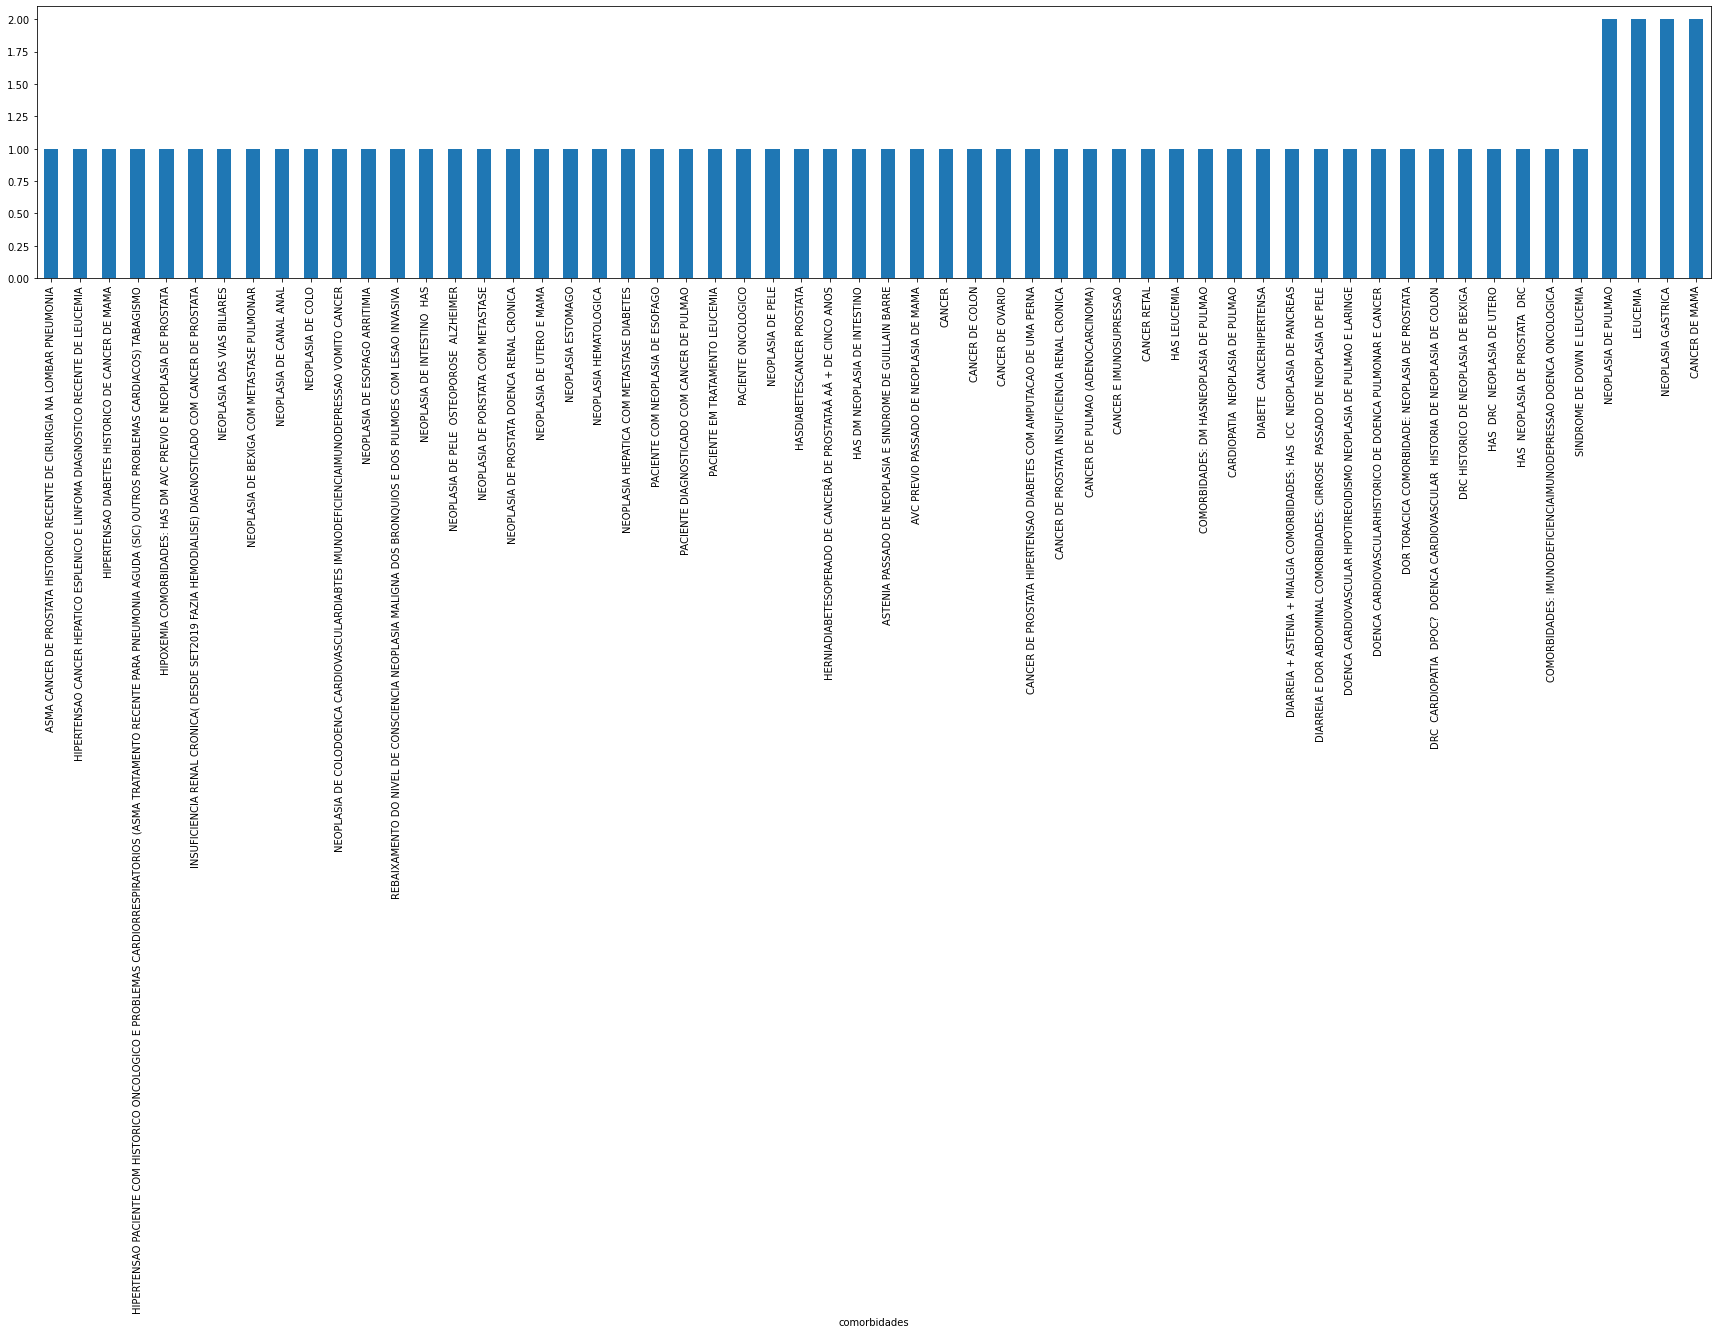

In [46]:
plotar_comorbidades(obito)

**Recuperados**

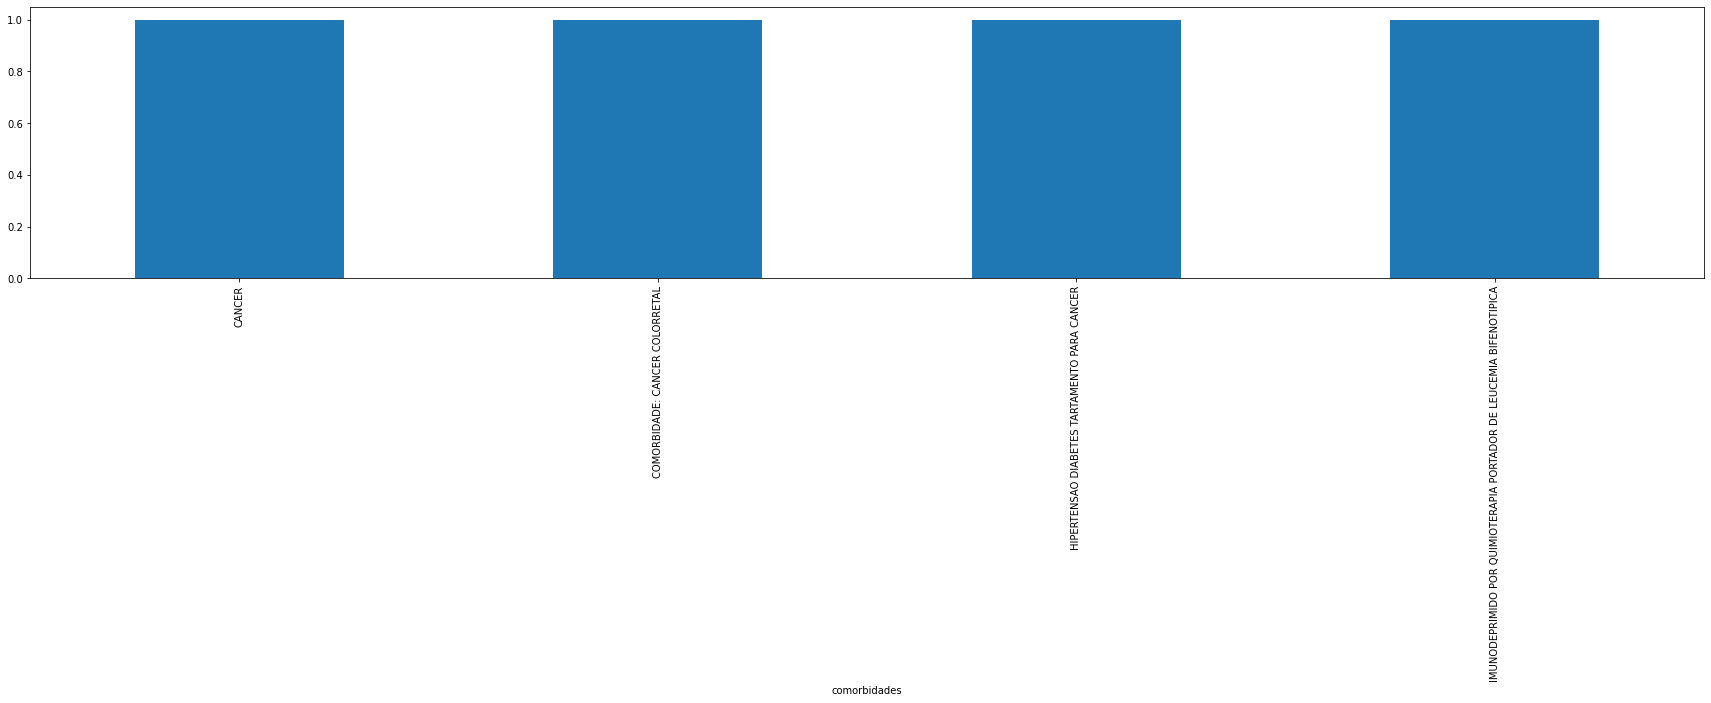

In [47]:
plotar_comorbidades(recuperados)

**Transmissores**

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


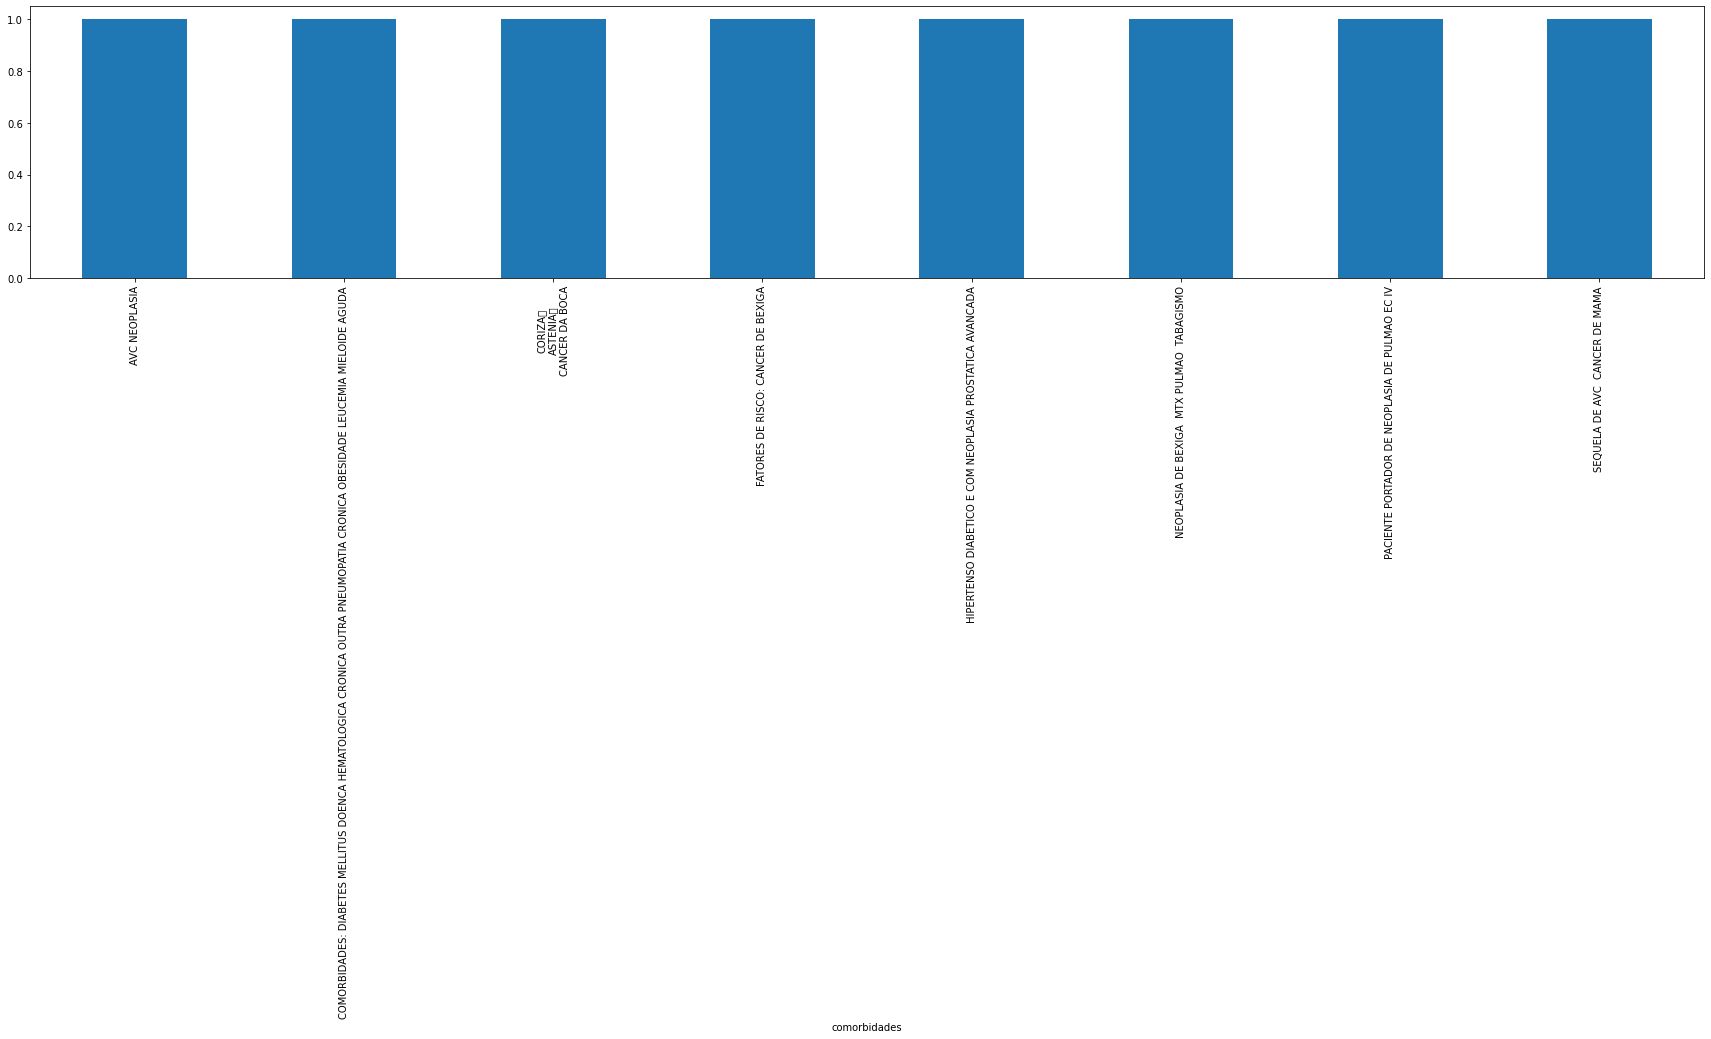

In [48]:
plotar_comorbidades(transmissores)



> **Isolamento**



In [49]:
plotar_comorbidades(isolamento)

Não há indivíduos neste grupo!


> **Enfermaria**



/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


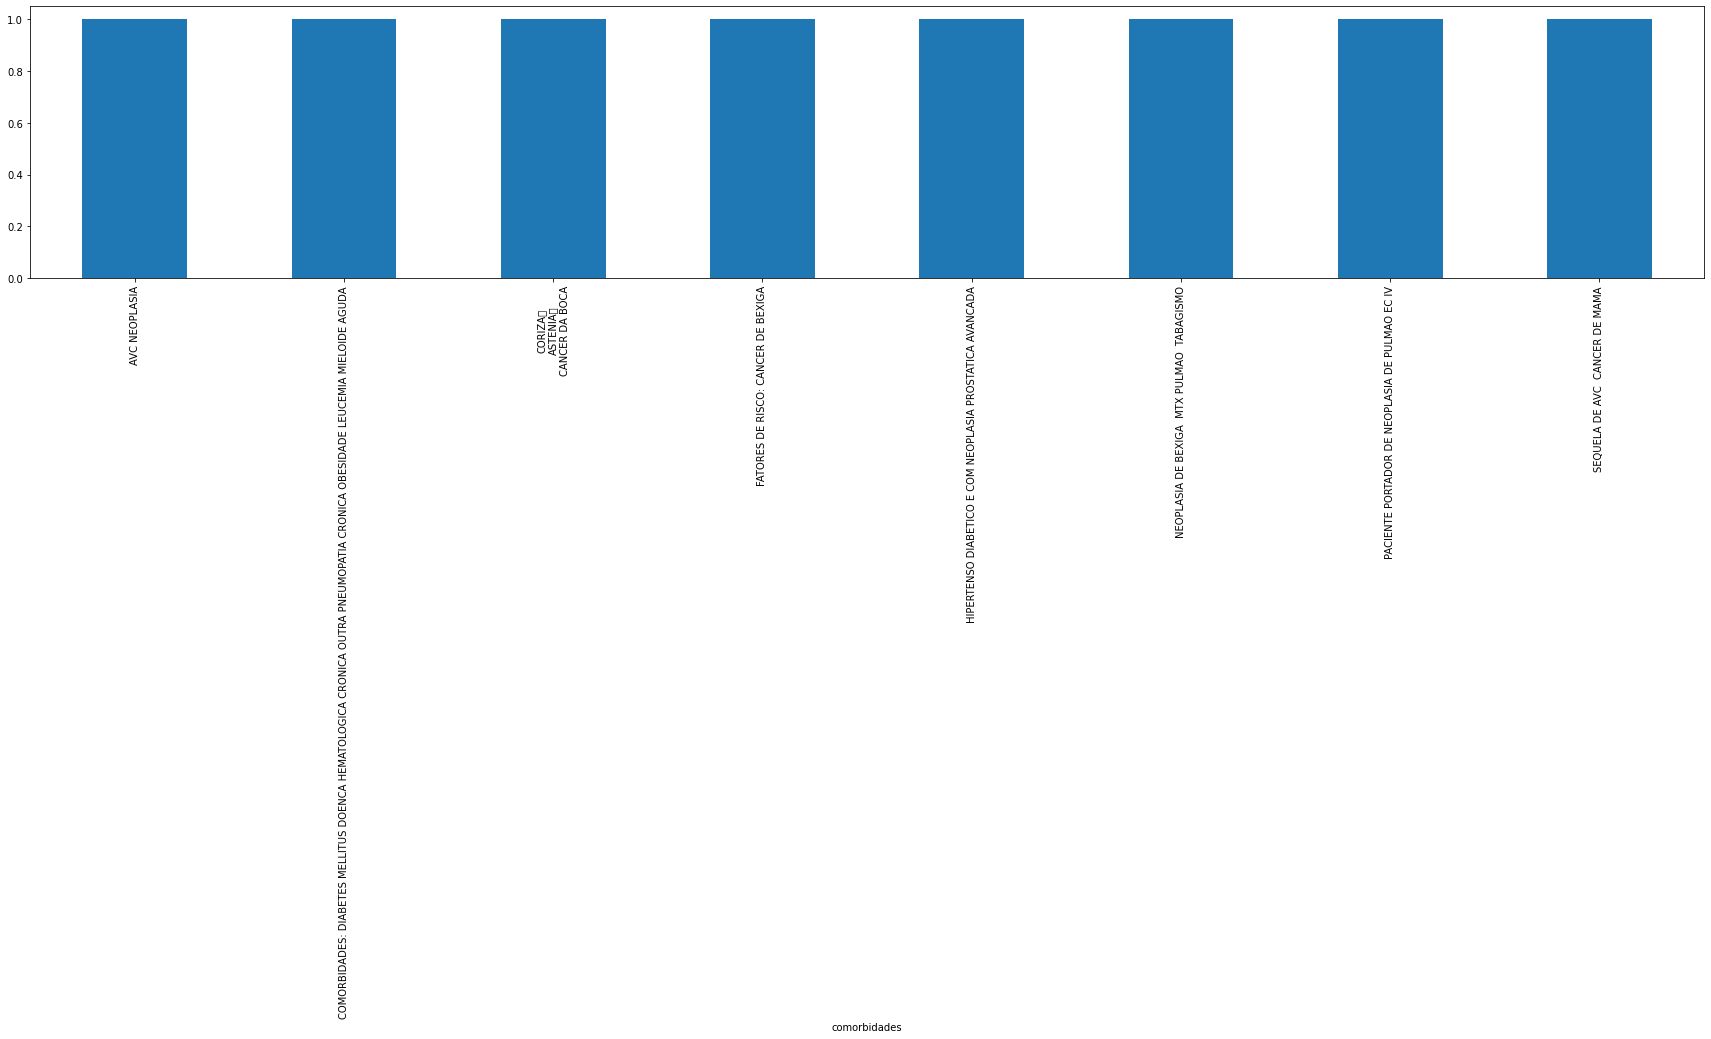

In [50]:
plotar_comorbidades(enfermaria)

> **UTI**



In [51]:
plotar_comorbidades(uti)

Não há indivíduos neste grupo!


##**Data do óbito**
O gráfico de barras apresenta, para cada semana especificada na legenda, o número de óbitos que ocorreram em cada faixa etária.

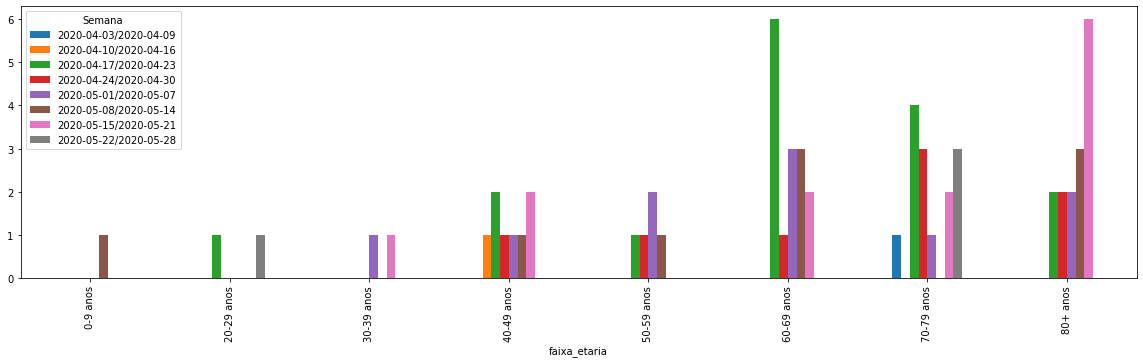

In [52]:
dt_obito = obito.copy()
dt_obito['dt_obito']=pd.to_datetime(dt_obito['dt_obito'])
dt_obito['Semana'] = dt_obito['dt_obito'].dt.to_period('W-THU')
dt_obito.groupby(['Semana', 'faixa_etaria']).size().unstack(0).plot.bar(figsize=(20,5))

##**Dias para o óbito**
O gráfico de barras apresenta a quantidade de pacientes que vieram a óbito, considerando a diferença de dias entre o primeiro sintoma e a data do óbito.

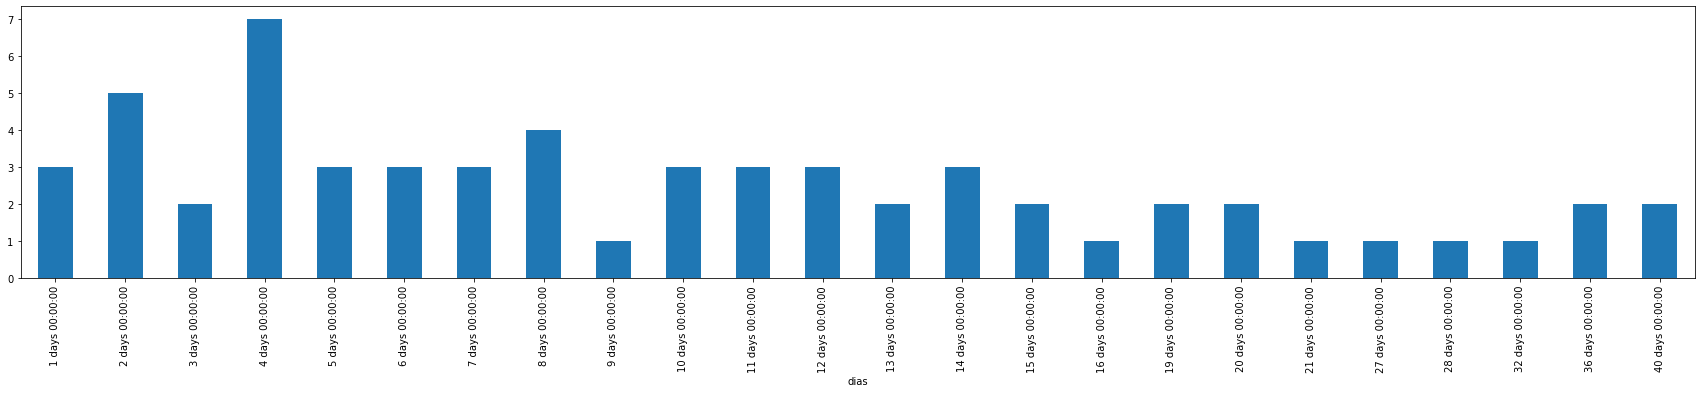

In [53]:
tempo = obito.copy()
tempo['dt_obito']=pd.to_datetime(tempo['dt_obito'])
tempo['dt_primeiros_sintomas']=pd.to_datetime(tempo['dt_primeiros_sintomas'])
tempo['dias'] = abs(tempo['dt_obito'] - tempo['dt_primeiros_sintomas'])
dias = tempo.groupby('dias')
dias.size().plot.bar(figsize=(30,5))

##**Hospitalização**

In [0]:
def plotar_hospitalizacao(grupo):
  hospitalizacao = grupo.groupby('hospitalizacao').size()
  hospitalizacao.plot.bar()
  print(hospitalizacao)

**Óbito**

hospitalizacao
NAO     5
SIM    53
dtype: int64


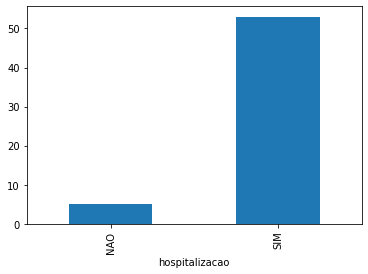

In [55]:
plotar_hospitalizacao(obito)

**Recuperados**

hospitalizacao
NAO    1
SIM    3
dtype: int64


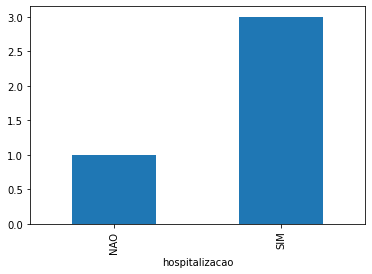

In [56]:
plotar_hospitalizacao(recuperados)

**Transmissores**

hospitalizacao
SIM    7
dtype: int64


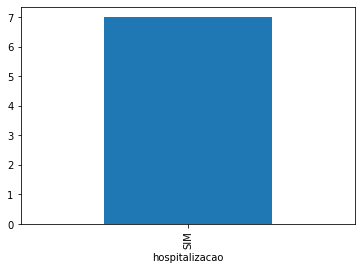

In [57]:
plotar_hospitalizacao(transmissores)

##**Município**

In [0]:
def plotar_municipio(grupo):
  municipio = grupo.groupby('municipio').size()
  if len(municipio) > 0:
    municipio.sort_values(inplace=True)
    municipio.plot.bar(figsize=(30,5))
  else:
    print('Não há indivíduos neste grupo!')

**Óbito**

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


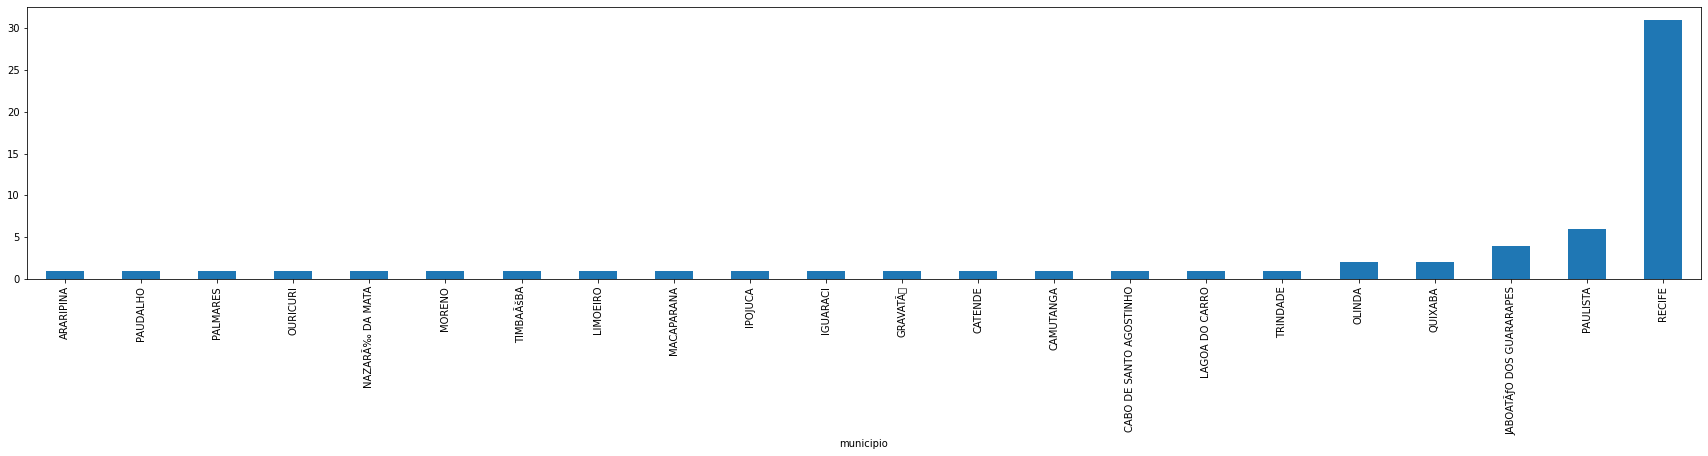

In [59]:
plotar_municipio(obito)

**Recuperados**

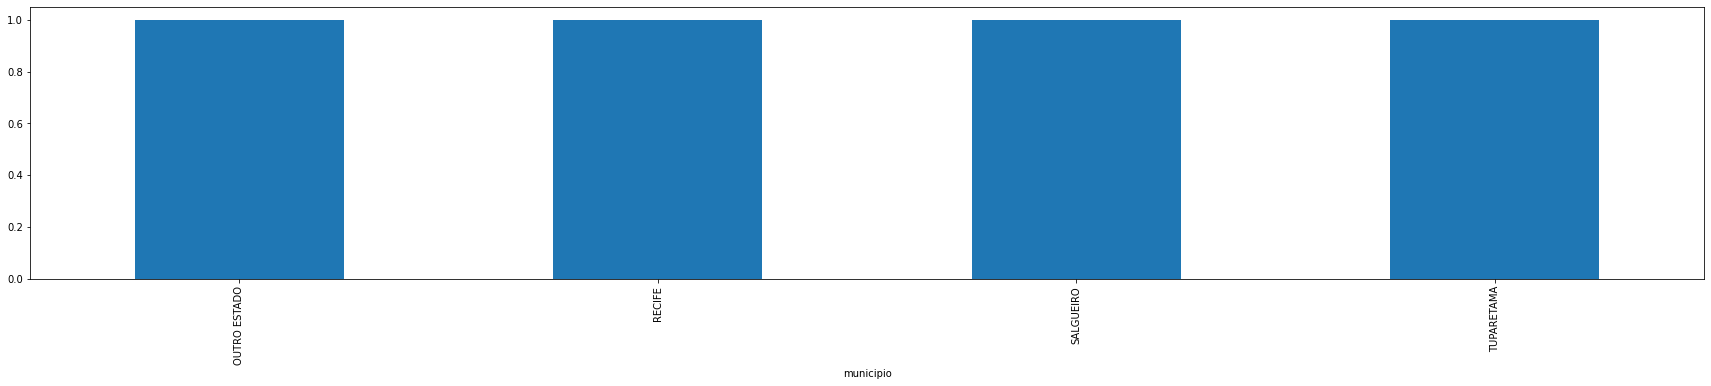

In [60]:
plotar_municipio(recuperados)

**Transmissores**

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


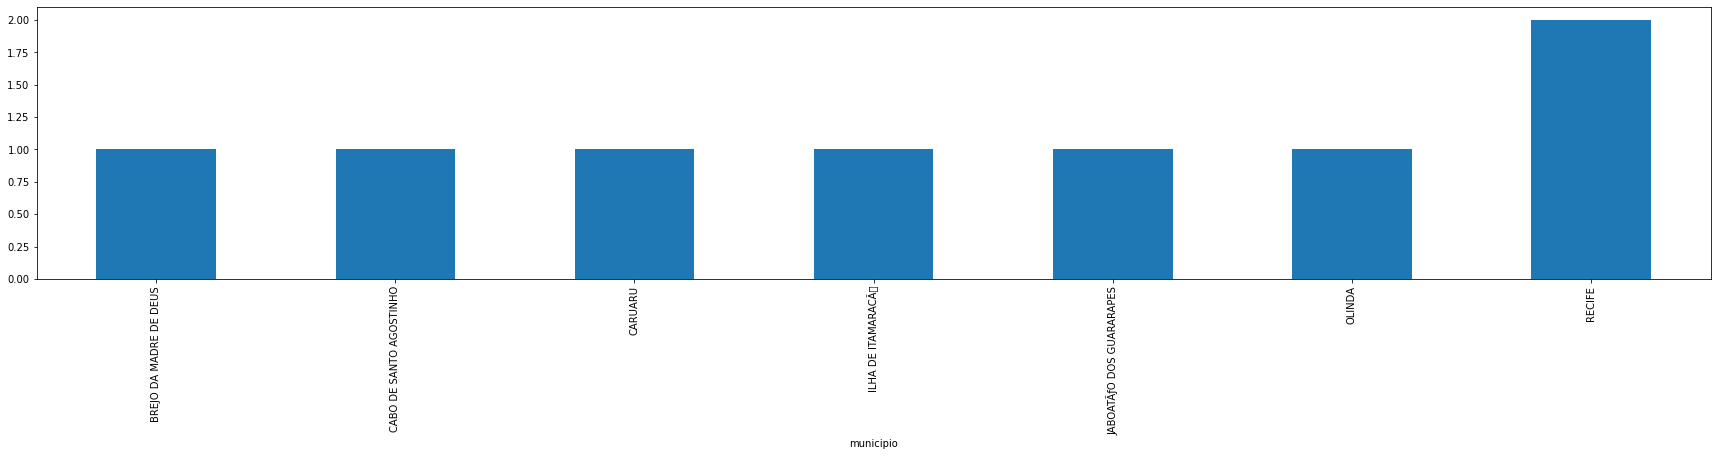

In [61]:
plotar_municipio(transmissores)



> **Isolamento**



In [62]:
plotar_municipio(isolamento)

Não há indivíduos neste grupo!


> **Enfermaria**



/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


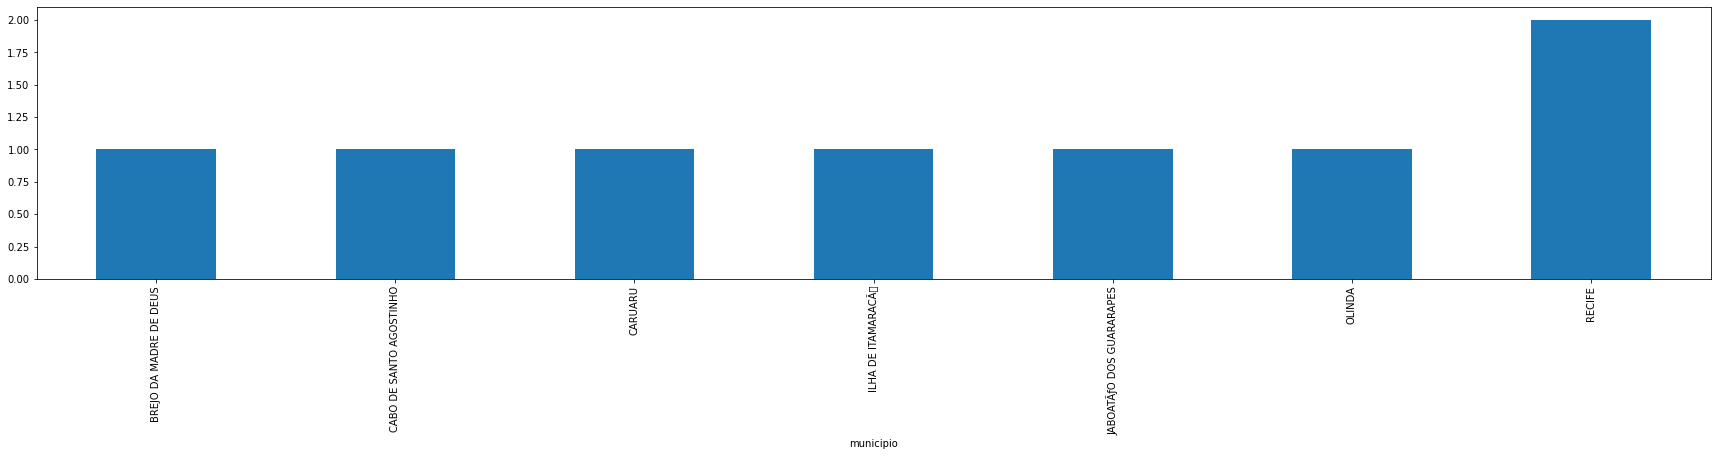

In [63]:
plotar_municipio(enfermaria)

> **UTI**



In [64]:
plotar_municipio(uti)

Não há indivíduos neste grupo!


##**Sexo**

In [0]:
def plotar_sexo(grupo):
  sexo = grupo.groupby('Sexo').size()
  if len(sexo) > 0:
    sexo.plot.bar()
    print(sexo)
  else:
    print('Não há indivíduos neste grupo!')

**Óbito**

Sexo
FEMININO     22
MASCULINO    40
dtype: int64


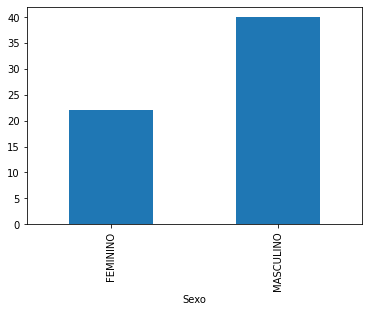

In [66]:
plotar_sexo(obito)

**Recuperados**

Sexo
FEMININO     3
MASCULINO    1
dtype: int64


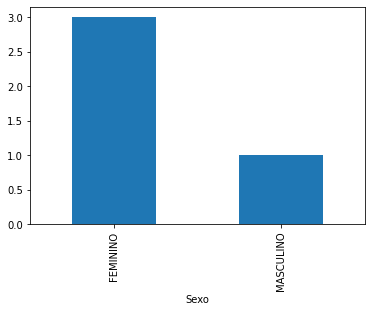

In [67]:
plotar_sexo(recuperados)

**Transmissores**

Sexo
FEMININO     5
MASCULINO    3
dtype: int64


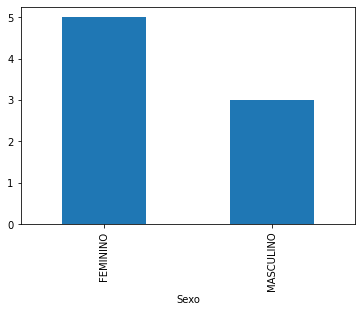

In [68]:
plotar_sexo(transmissores)



> **Isolamento**



In [69]:
plotar_sexo(isolamento)

Não há indivíduos neste grupo!


> **Enfermaria**



Sexo
FEMININO     5
MASCULINO    3
dtype: int64


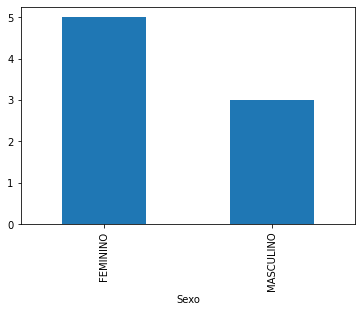

In [70]:
plotar_sexo(enfermaria)

> **UTI**



In [71]:
plotar_sexo(uti)

Não há indivíduos neste grupo!


##**Sintomas**

In [0]:
def plotar_sintomas(grupo):
  sintomas = grupo.groupby('sintomas').size()
  if len(sintomas) > 0:
    sintomas.sort_values(inplace=True)
    sintomas.plot.bar(figsize=(30,5))
  else:
    print('Não há indivíduos neste grupo!')

**Óbito**

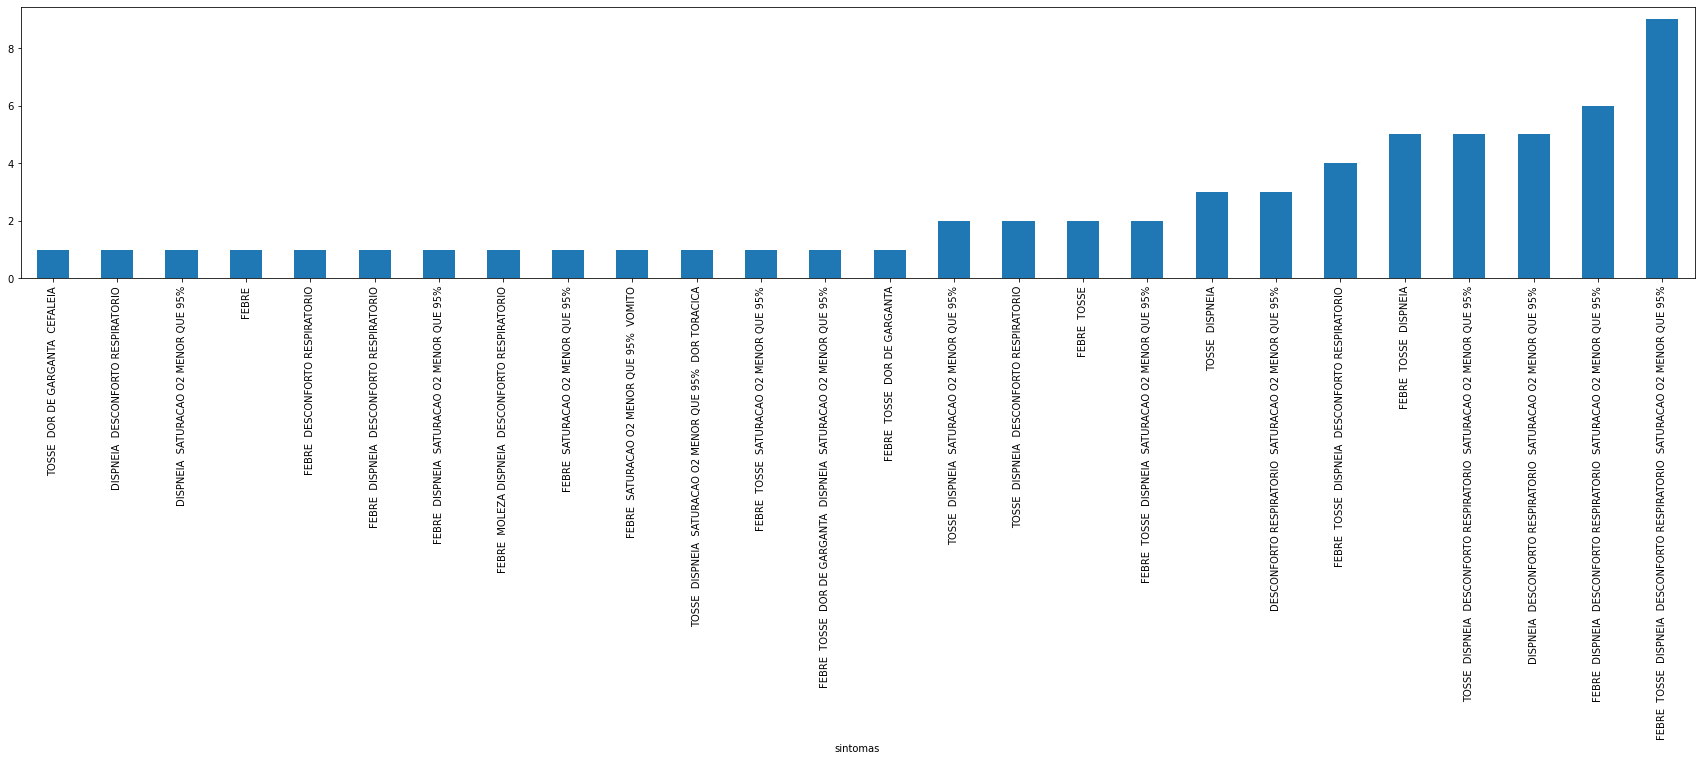

In [73]:
plotar_sintomas(obito)

**Recuperados**

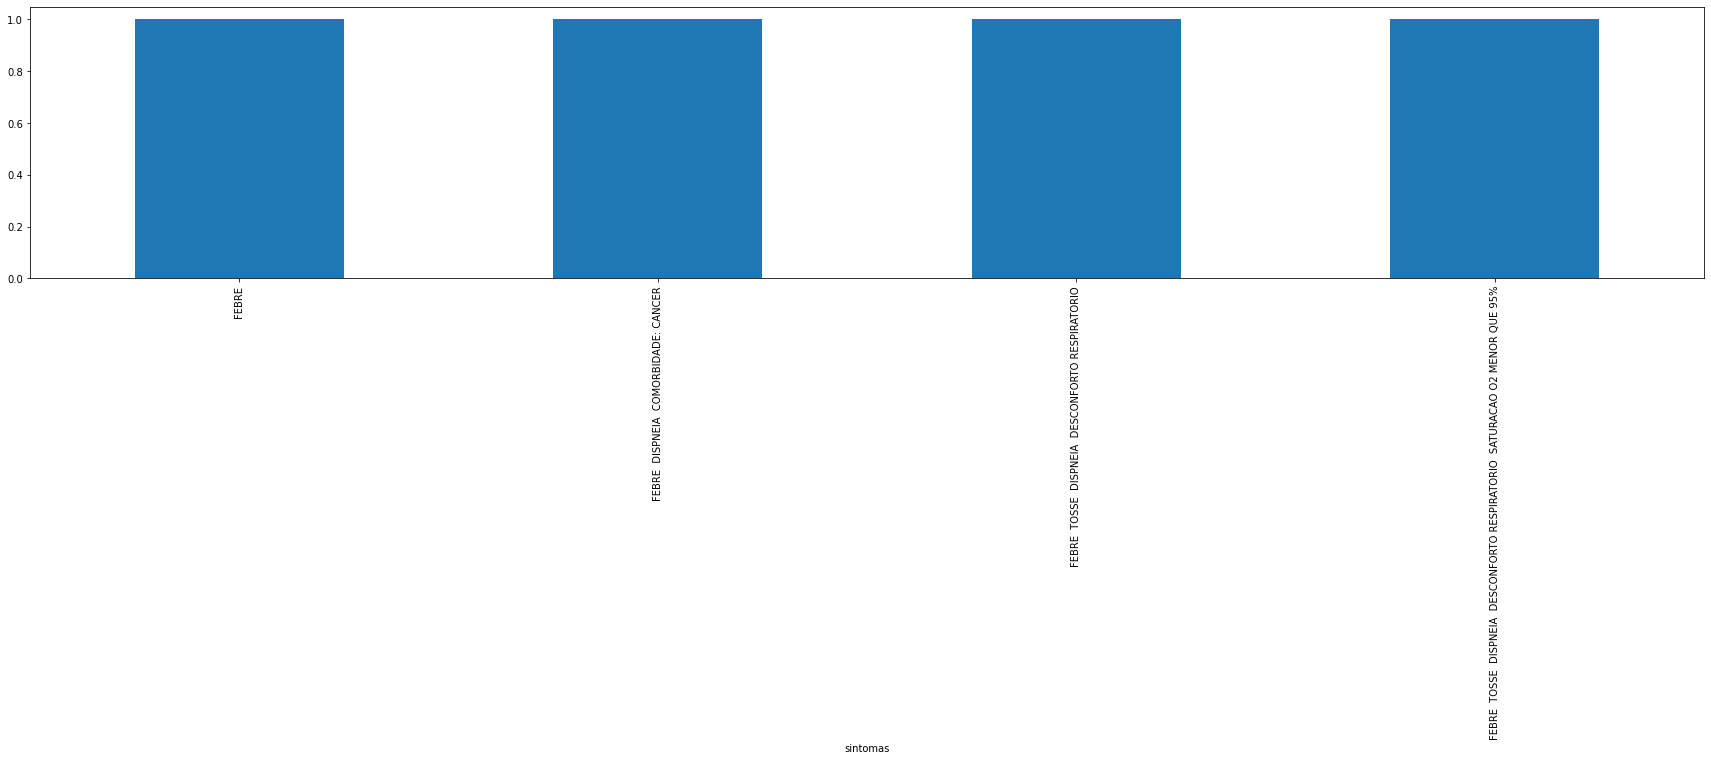

In [74]:
plotar_sintomas(recuperados)

**Transmissores**

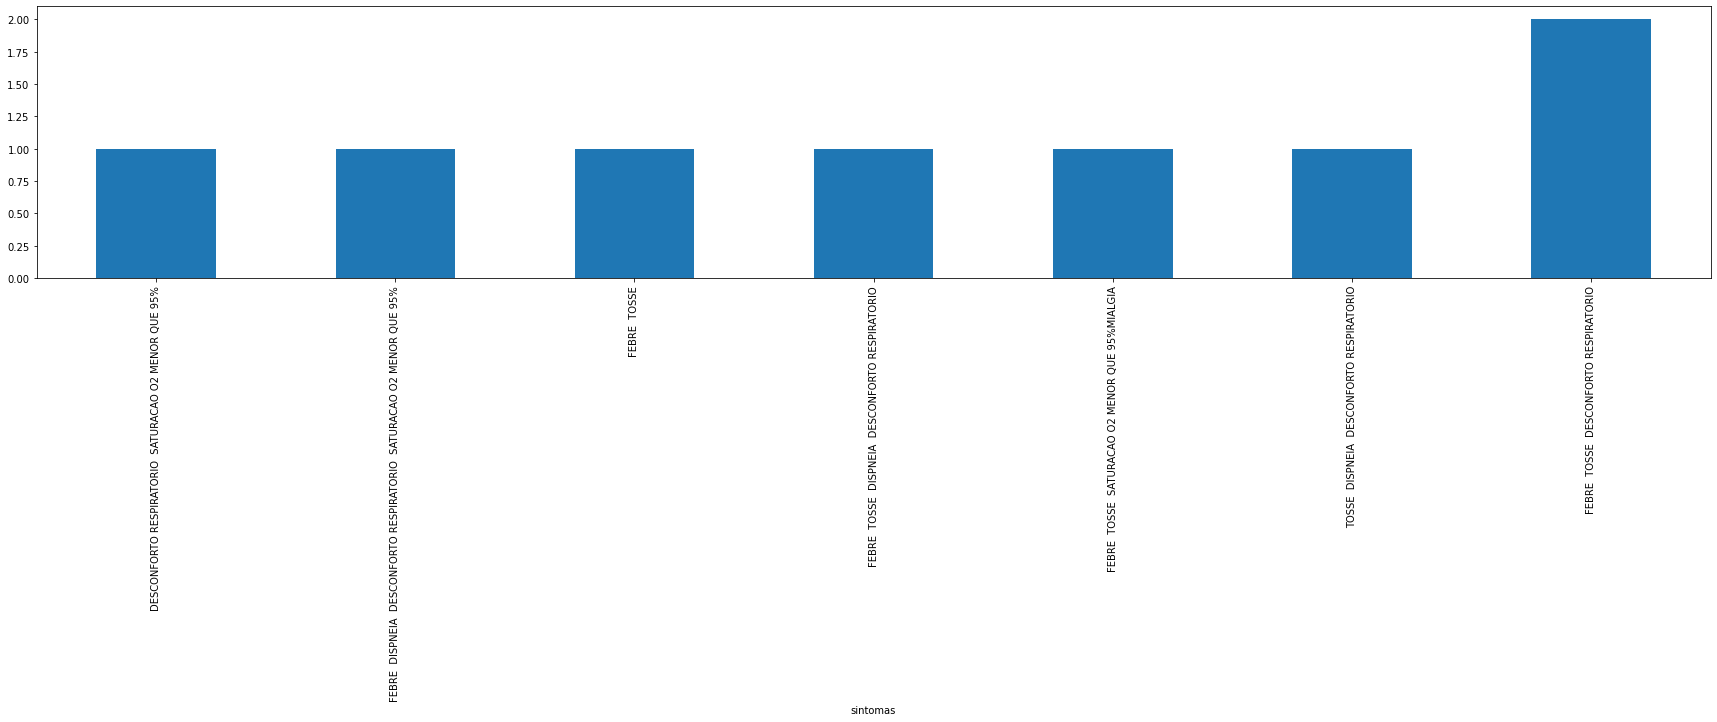

In [75]:
plotar_sintomas(transmissores)



> **Isolamento**



In [76]:
plotar_sintomas(isolamento)

Não há indivíduos neste grupo!




> **Enfermaria**



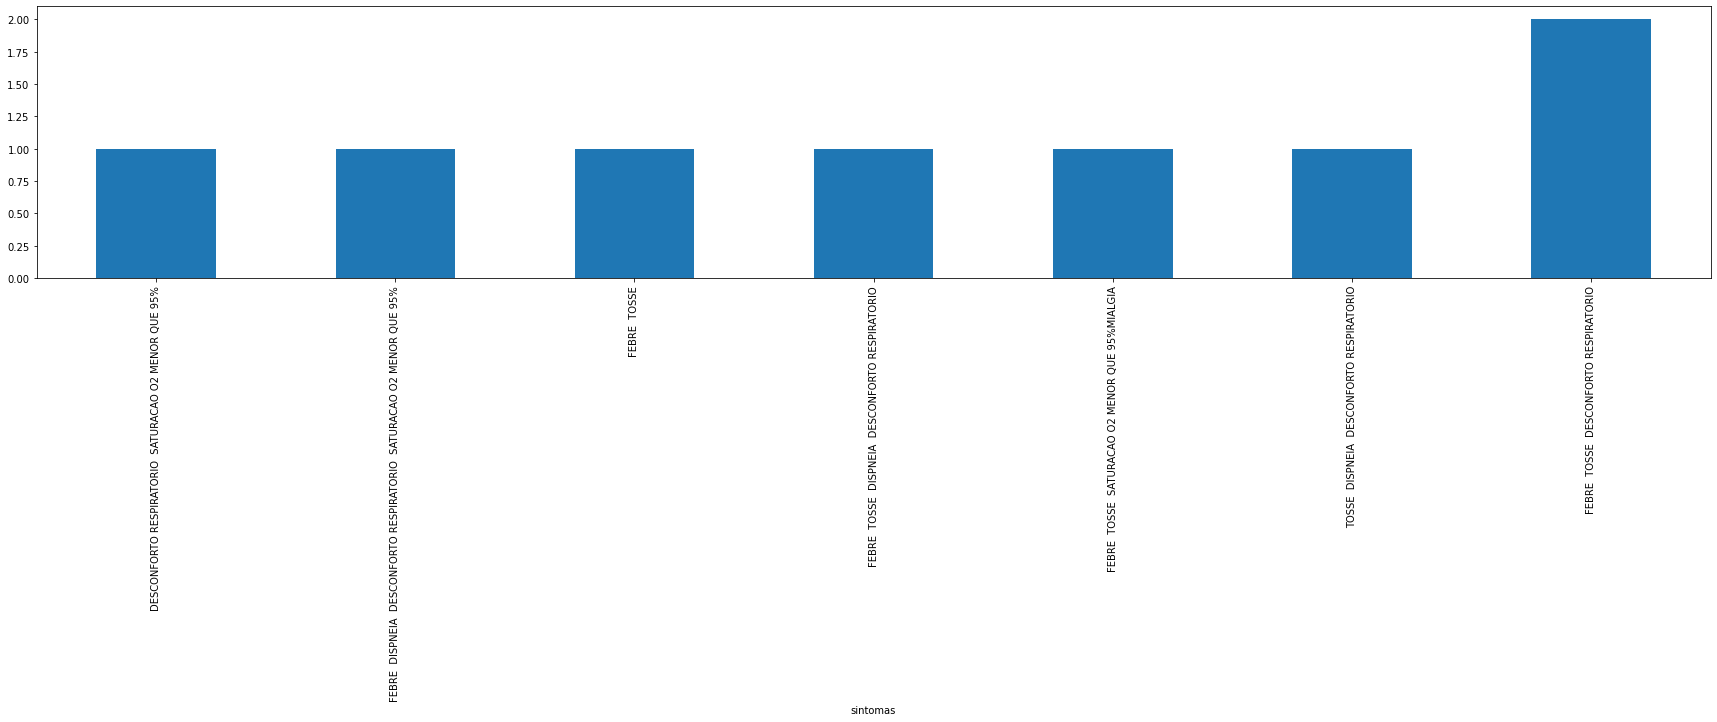

In [77]:
plotar_sintomas(enfermaria)



> **UTI**



In [78]:
plotar_sintomas(uti)

Não há indivíduos neste grupo!
